<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/catboost_sku_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost


In [2]:
import pandas as pd
df = pd.read_excel('/content/mat_y_40_sku.xlsx')

In [3]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1)).dt.to_period('M')
df

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL,Date
0,1,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,757.015534,68.88,0.971298,0.287575,2022-01
1,2,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,767.246528,2.88,0.491319,0.015748,2022-02
2,3,2022,"Сыр полутвёрдый BELFOR Флоу-пак 240 г 45,0%",240 г,Другой3,BELFOR,999.458333,0.24,0.000000,0.002016,2022-03
3,1,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3024.421769,14.70,0.777143,1.000000,2024-01
4,2,2024,Сыр полутвёрдый Casa Margot Эмменталер Флоу-па...,150 г,Эмменталер,Casa Margot,3118.870635,12.60,0.726190,1.000000,2024-02
...,...,...,...,...,...,...,...,...,...,...,...
2030,10,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,685.842388,14049.80,0.712729,0.027145,2023-10
2031,11,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,851.198597,3244.00,0.410310,0.006087,2022-11
2032,11,2023,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,702.743684,12592.60,0.418561,0.026897,2023-11
2033,12,2022,Сыр полутвёрдый Эконива Щучанский Флоу-пак 200...,200 г,Классический,Эконива,800.631289,8167.40,0.680883,0.017582,2022-12


0:	learn: 16094.2870217	test: 18296.0872124	best: 18296.0872124 (0)	total: 10.7ms	remaining: 53.7s
100:	learn: 10349.6466134	test: 13063.6647064	best: 13063.6647064 (100)	total: 1.42s	remaining: 1m 8s
200:	learn: 7611.9540302	test: 10382.8817224	best: 10382.8817224 (200)	total: 2.72s	remaining: 1m 4s
300:	learn: 6393.1454928	test: 9242.8152593	best: 9242.8152593 (300)	total: 4.04s	remaining: 1m 3s
400:	learn: 5587.3206361	test: 8771.9708589	best: 8771.9708589 (400)	total: 4.97s	remaining: 57s
500:	learn: 5030.8022773	test: 8507.9124599	best: 8507.9124599 (500)	total: 5.7s	remaining: 51.2s
600:	learn: 4613.3886865	test: 8342.2147367	best: 8342.2147367 (600)	total: 6.51s	remaining: 47.6s
700:	learn: 4240.2875631	test: 8201.3710307	best: 8201.3710307 (700)	total: 7.63s	remaining: 46.8s
800:	learn: 3930.0204639	test: 8123.8013756	best: 8123.6690795 (799)	total: 8.08s	remaining: 42.3s
900:	learn: 3645.9992862	test: 8072.6332554	best: 8072.6332554 (900)	total: 8.39s	remaining: 38.2s
1000:	le

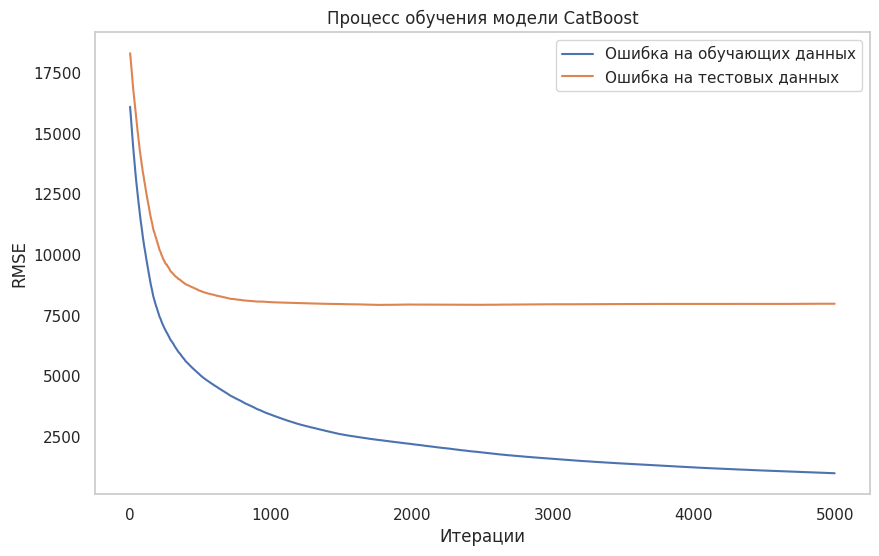

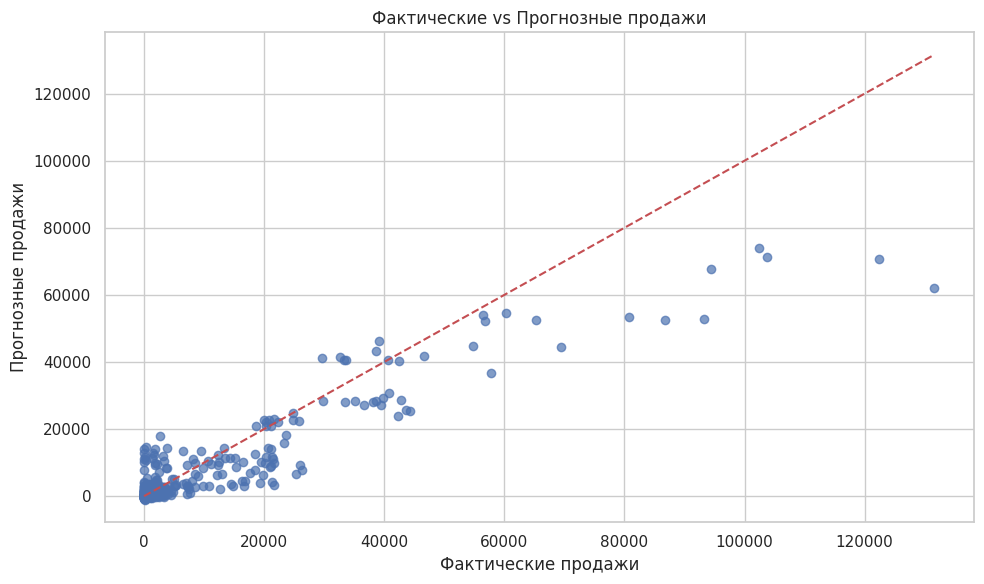

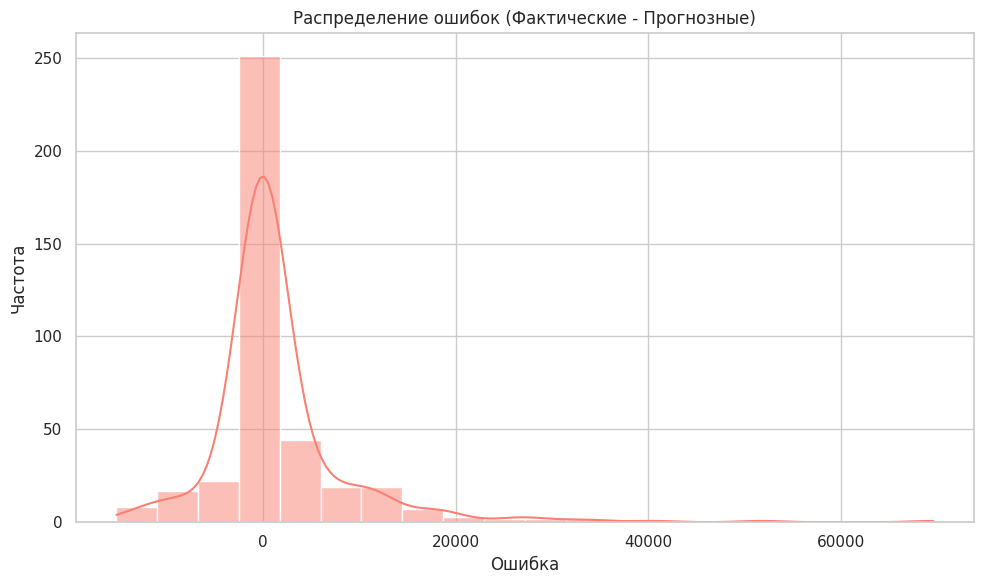

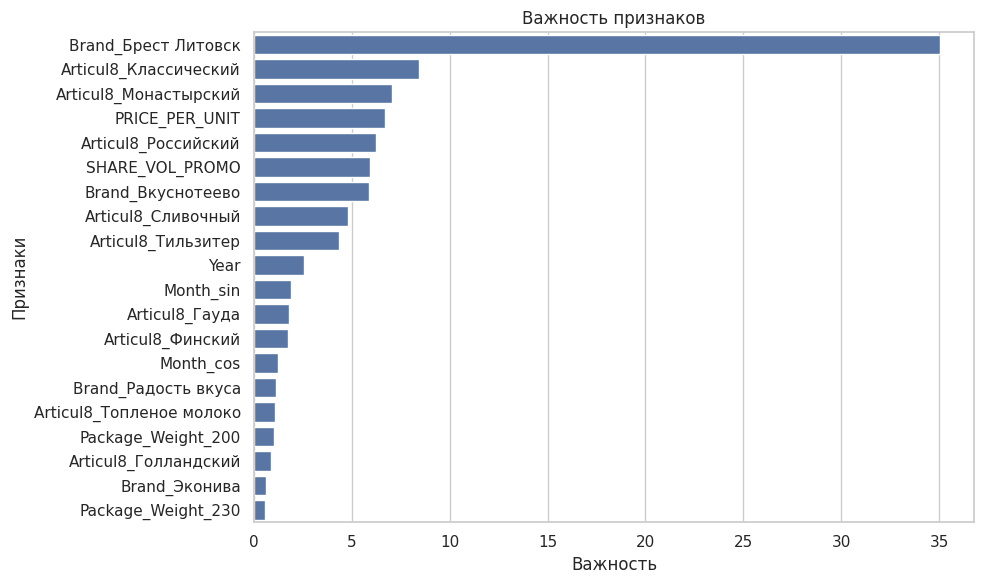

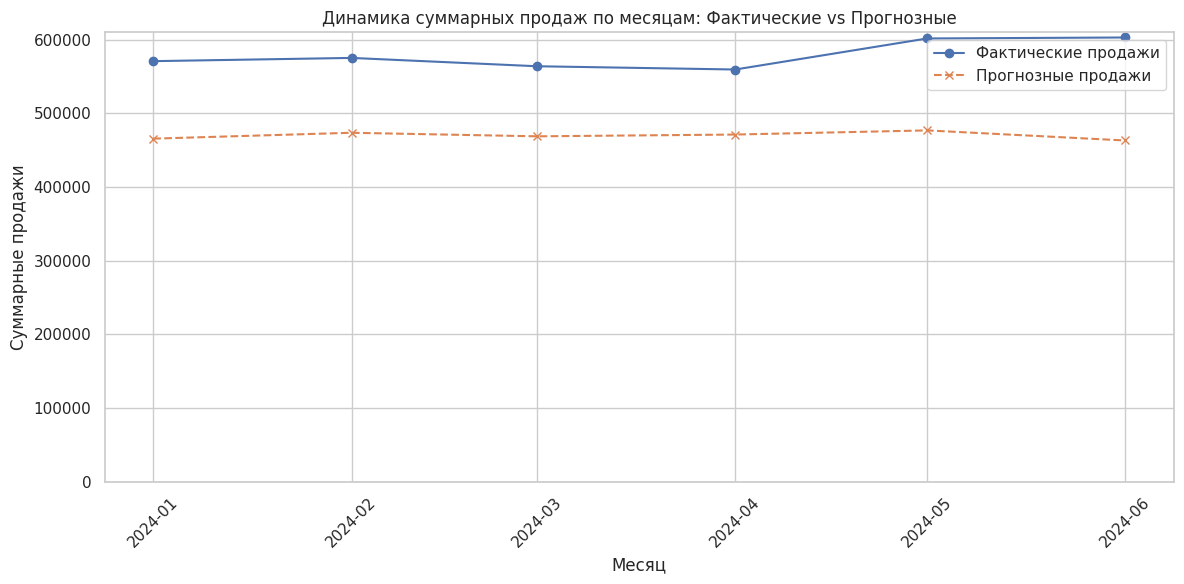


Суммарные фактические и прогнозные продажи по Brand:
        Brand_r  Sales_Actual  Sales_Predicted
0   Casa Margot        116.70      4790.524684
1  Cheese House      79813.86     27225.744789
2     Excelsior        264.06      1871.928895
3     LAPLANDIA      29461.88     20952.184466
4    La Paulina       2531.46      3410.471838


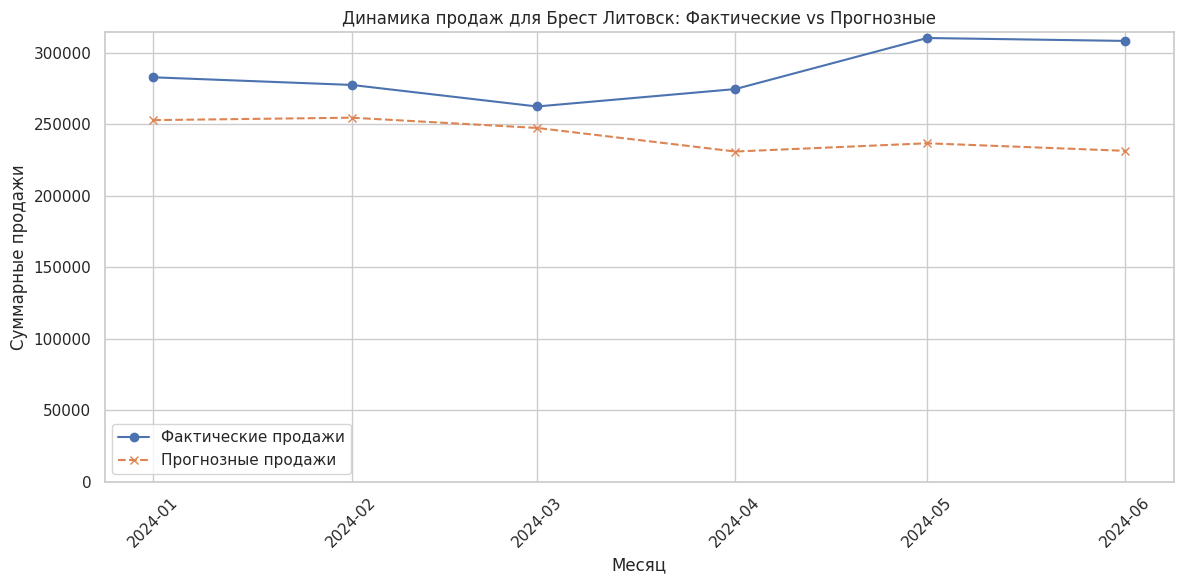

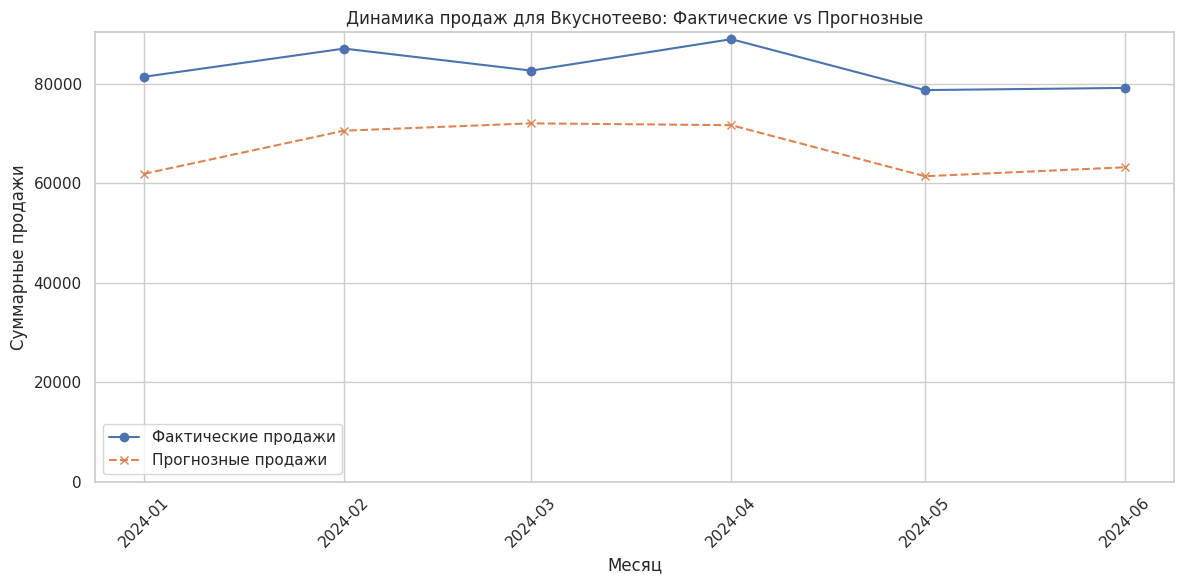

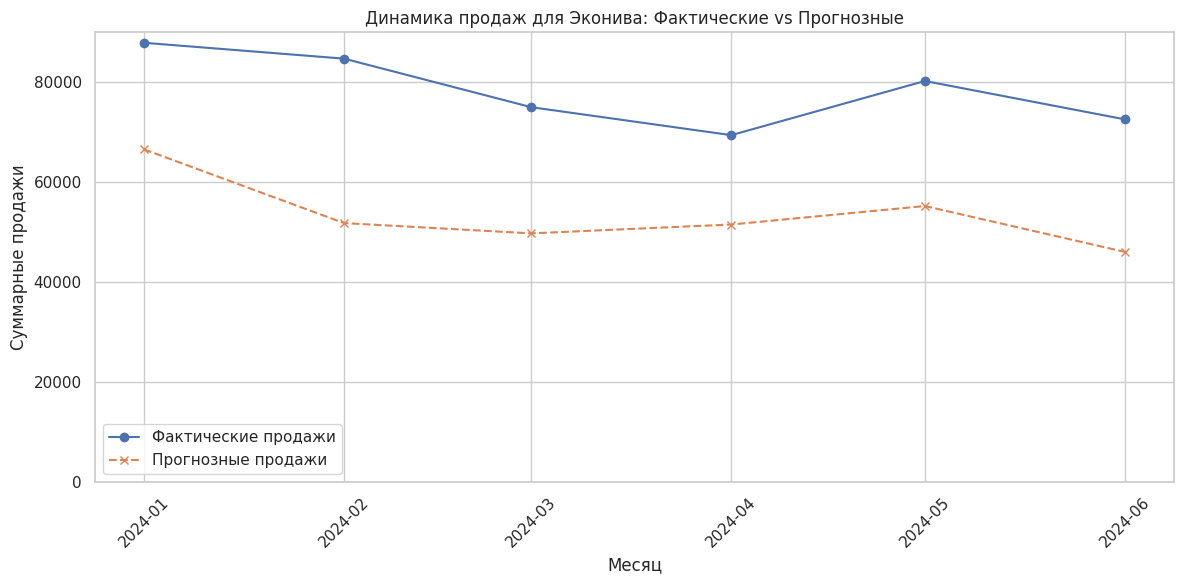

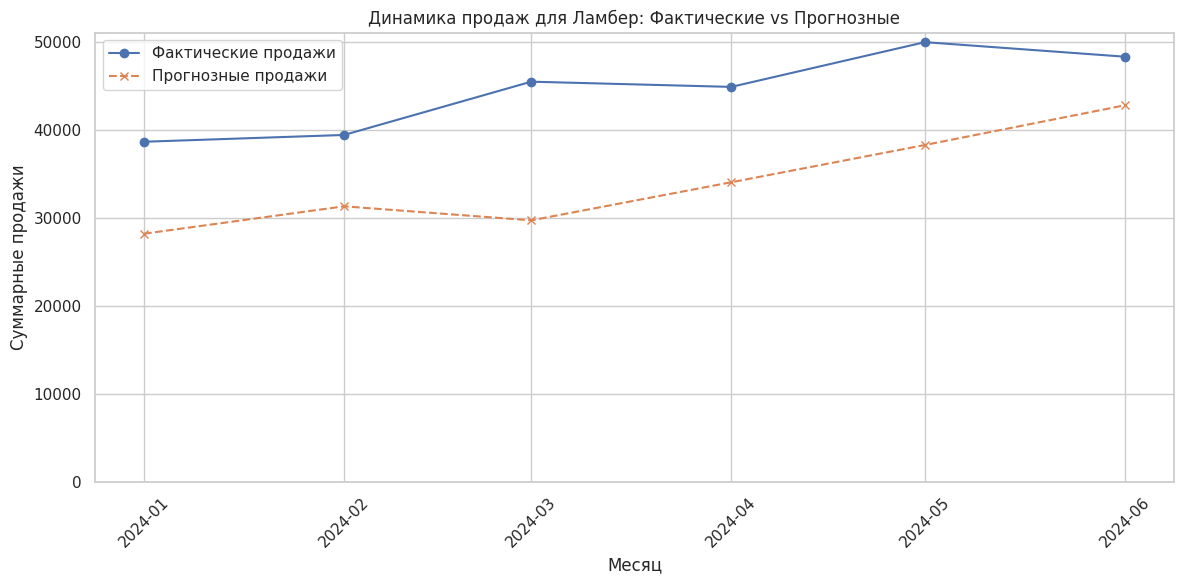

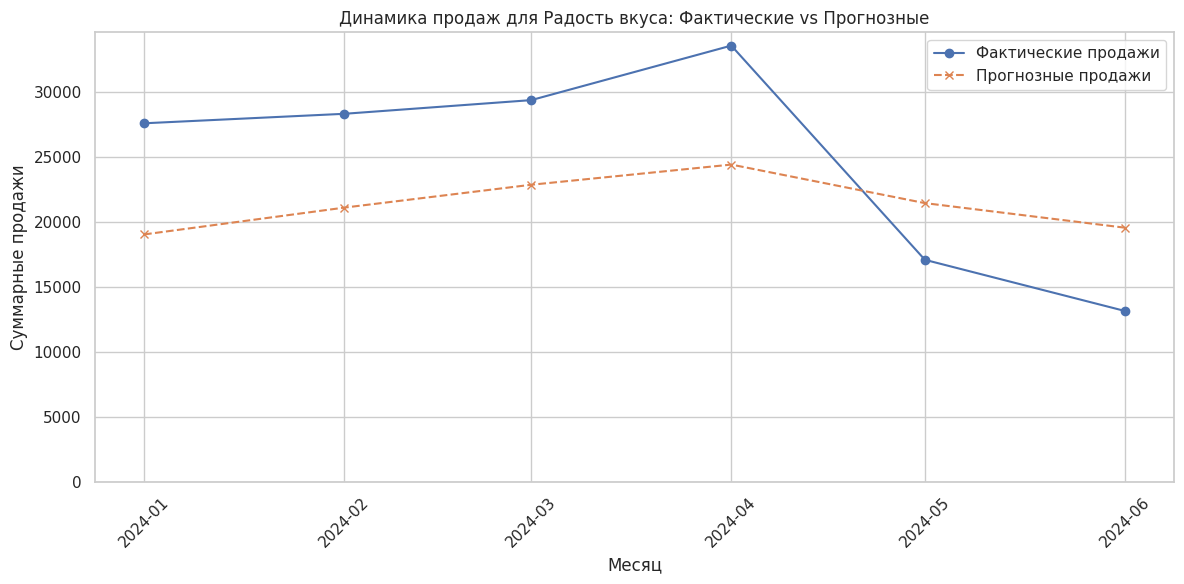


Суммарные фактические и прогнозные продажи по типам продукта (Articul8_r):
           Articul8_r  Sales_Actual  Sales_Predicted
0             Gourmet       8038.50     22118.409067
1             Protein          4.80       228.051756
2     Альпийское утро       9754.92      6570.086778
3             Арамель       3421.00      4692.379119
4  Башкирский медовый       1025.24     13288.476907


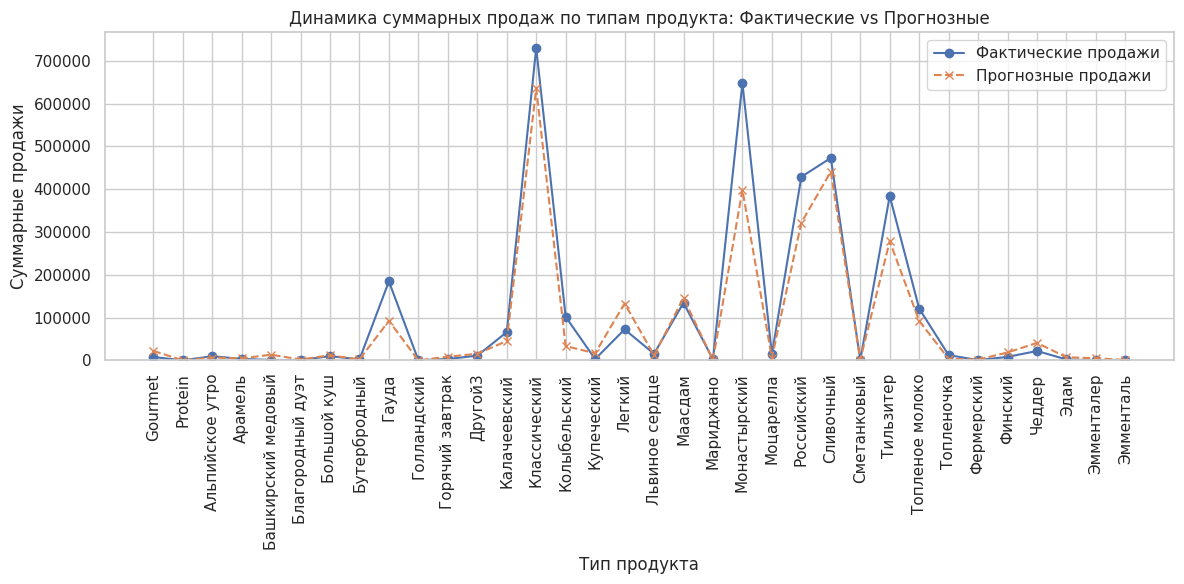

<ipython-input-12-f9fa71f691e7>:456: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


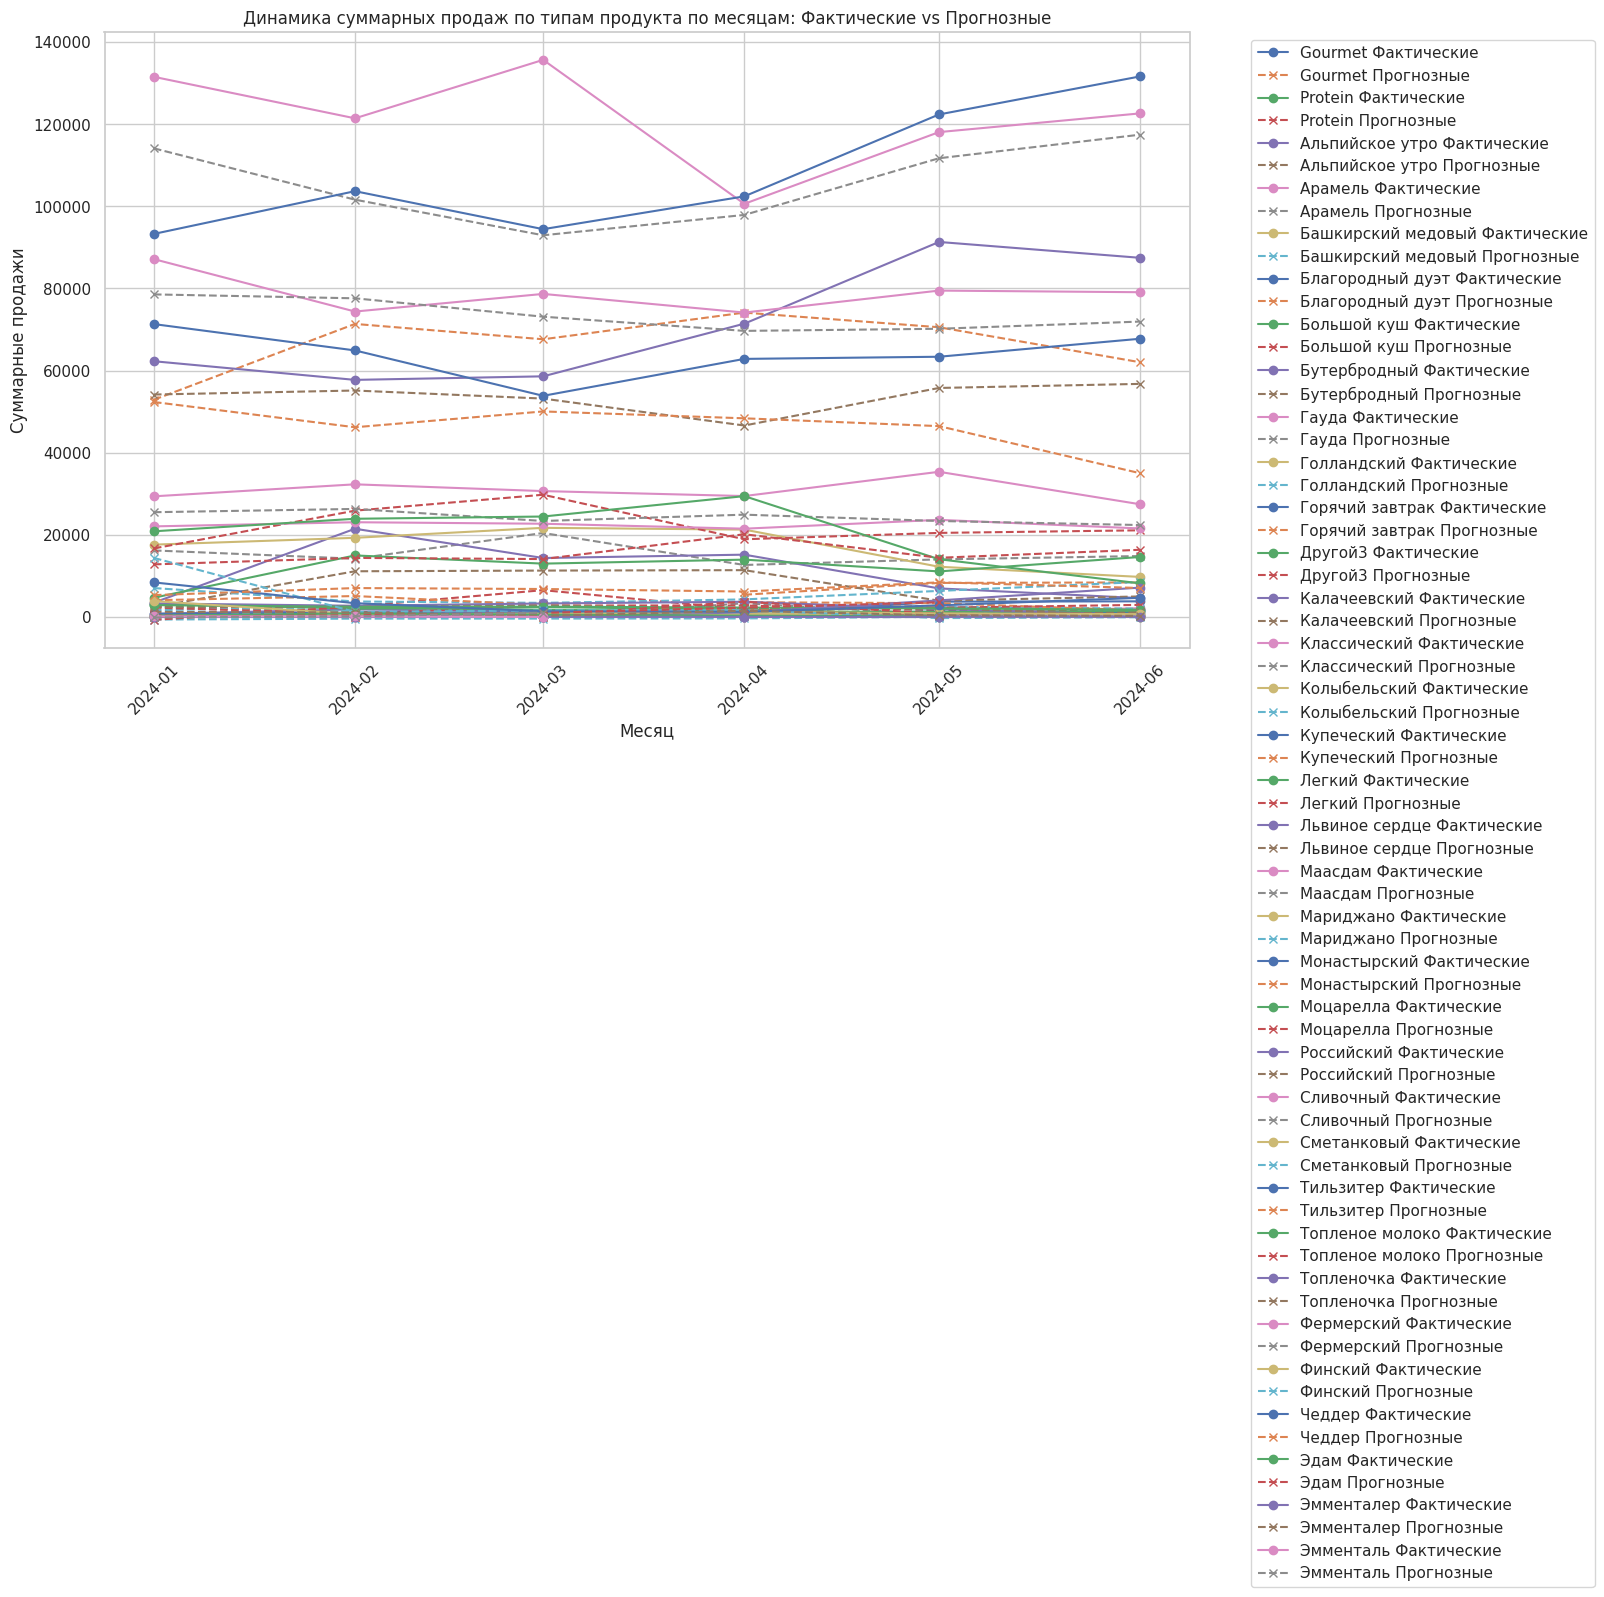

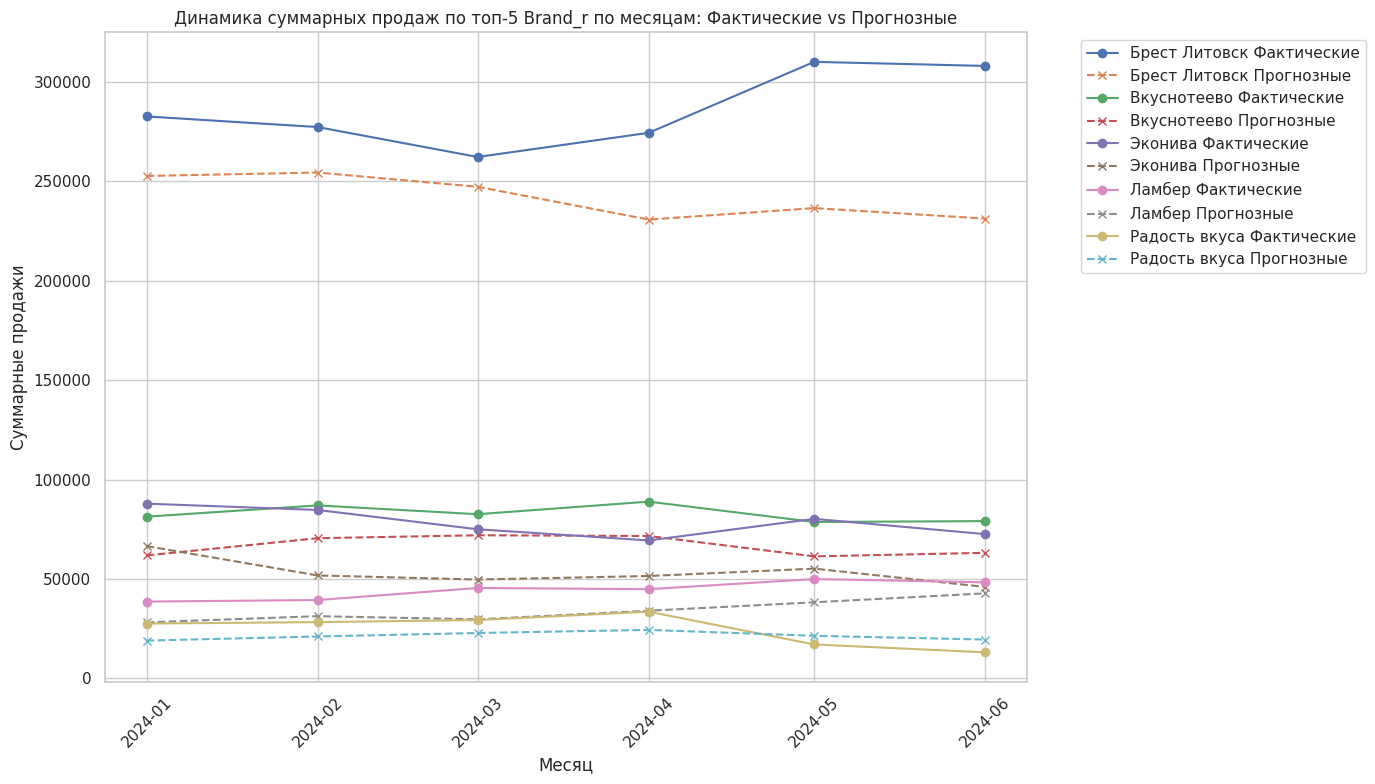


Построение линейных графиков завершено успешно.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_log_error

def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2


# Установка стиля для графиков
sns.set(style="whitegrid")

# Параметры генерации данных
# START_DATE = datetime(2022, 1, 1)  # Начало периода
data=df.copy()

# 1. Обработка новых колонок для модели
# data['Promotion'] = data['SHARE_VOL_PROMO'].apply(lambda x: 1 if x > 0 else 0)  # Признак проведения промо
data['Package_Weight'] = data['Analytic1'].apply(lambda x: int(x.split()[0]))  # Преобразование веса в числовой формат
# data['Year_f'] = data['Date'].dt.year
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Brand_r']=data['Brand'].values
data['Articul8_r']=data['Articul8'].values

data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

# # Скользящие средние
# for roll in [4]:
#   data[f'PRICE_PER_UNIT_roll_mean_{roll}'] = data['PRICE_PER_UNIT'].rolling(window=roll).mean()
#   data[f'SHARE_VOL_PROMO_roll_mean_{roll}'] = data['SHARE_VOL_PROMO'].rolling(window=roll).mean()

# # Создание лаговых признаков для целевой переменной SALES_VOL
# for lag in [1,2,3,6,24]:
#     data[f'SALES_VOL_lag_{lag}'] = data['SALES_VOL'].shift(lag)

# for lag in [1,2]:  # Лаги 1, 2, 3
#     df[f'PRICE_PER_UNIT_lag_{lag}'] = df['PRICE_PER_UNIT'].shift(lag)
#     df[f'SHARE_VOL_PROMO_lag_{lag}'] = df['SHARE_VOL_PROMO'].shift(lag)




# data = pd.get_dummies(data, columns=['Package_Weight'], prefix='Weight')

# # Явно преобразуем столбцы в бинарные значения с помощью .applymap()
# weight_columns = data.columns.str.startswith('Weight')
# # Находим все столбцы, начинающиеся с 'Weight'
# weight_columns = data.columns[data.columns.str.startswith('Weight')]

# # Явно преобразуем значения в 0 и 1 с использованием astype(int)
# data.loc[:, weight_columns] = data.loc[:, weight_columns].astype(int)
# print(data)
# 22/0



# 2. Преобразование категориальных признаков (Brand и Articul8)
# categorical_features = ['Brand', 'Articul8','Package_Weight']
# label_encoders = {}
# for col in categorical_features:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le



# Список категориальных признаков
categorical_features = ['Brand', 'Articul8', 'Package_Weight']

# Создаем объект OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # Используем sparse_output вместо sparse

# Применяем OneHotEncoder к категориальным признакам
encoded_features = encoder.fit_transform(data[categorical_features])


# Создаем DataFrame из закодированных признаков
encoded_df = pd.DataFrame(encoded_features.astype(int), columns=encoder.get_feature_names_out(categorical_features))

# Сброс индексов в обоих DataFrame, чтобы они совпадали
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Объединяем закодированные признаки с оригинальными данными
data = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)
# data.drop(['Analytic1','Sku_name','SALES_VOL'],axis=1,inplace=True)

# print(encoded_df.columns.tolist())
# cat_features_indices = [features.index(col) for col in categorical_features]
# print(cat_features_indices)
# 22/0
# 3. Подготовка данных для модели
# features = ['Brand', 'Articul8', 'Package_Weight', 'PRICE_PER_UNIT', 'SHARE_VOL_PROMO', 'Year', 'Month']


df_sales_vol_org = data[data['Year'] >= 2024].copy()


# # Определение границ выбросов для целевой переменной
# Q1_y = data['SALES_VOL'].quantile(0.10)
# Q3_y = data['SALES_VOL'].quantile(0.90)
# IQR_y = Q3_y - Q1_y

# # Удаление выбросов в целевой переменной
# yt= (data['SALES_VOL'] >= (Q1_y - 1.5 * IQR_y)) & (data['SALES_VOL'] <= (Q3_y + 1.5 * IQR_y))
# data = data[yt]



# scaler = StandardScaler()

# y_train_scaled = scaler.fit_transform(data['SALES_VOL'].values.reshape(-1,1))
# data['SALES_VOL']=y_train_scaled

# data[['PRICE_PER_UNIT', 'SHARE_VOL_PROMO']]
# X_train_scaled = scaler.fit_transform(data[['PRICE_PER_UNIT', 'SHARE_VOL_PROMO']])

# data['PRICE_PER_UNIT']=X_train_scaled[:,0]
# data['SHARE_VOL_PROMO']=X_train_scaled[:,1]

# data_dales_box, lambda_value = stats.boxcox(data['SALES_VOL'])

# data['SALES_VOL']=data_dales_box

# scaler = StandardScaler()
# y_scaled = scaler.fit_transform(data['SALES_VOL'].to_frame())
# y_log = np.log1p(data['SALES_VOL'])
# data['SALES_VOL']=y_log


# data_dales_box, lambda_value = stats.boxcox(data['SALES_VOL'])

# data['SALES_VOL']=data_dales_box




# 4. Разделение данных на обучающую и тестовую выборки
# Используем данные до 2024 года в качестве обучающей выборки, 2024 год — тестовая выборка
train_df = data[data['Year'] < 2024]
test_df = data[data['Year'] >= 2024]

features = [i for i in data.columns.tolist() if i not in ['Analytic1','Sku_name','SALES_VOL','SHARE_VOL','Date','Month','Brand_r','Articul8_r']] #'Month','Date','Year'
target = 'SALES_VOL'
X = data[features]


X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]


# 5. Обучение модели CatBoostRegressor
# Определяем категориальные признаки для CatBoost
# cat_features_indices = [features.index(col) for col in categorical_features]

# cat_features_indices = [features.index(col) for col in data.columns.tolist()[9:]]
mtn ="RMSE"

# param_grid = {
#     'loss_function': [f'Huber:delta={delta}' for delta in [2.0,3.0,4.0]],
#     'iterations': [5000],
#     'depth': [4,6],  # Можно добавить другие значения глубины, если необходимо
#     'learning_rate': [0.01, 0.1],
#     'random_seed': [42]
# }
# Инициализация модели
model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.01,
    depth=8,
    eval_metric="RMSE",
    # early_stopping_rounds=50,
    random_seed=42,
    loss_function="RMSE",#'MAE', 'Quantile','Huber:delta=2.0' 'Quantile:alpha=0.9'
    verbose=100,
    # l2_leaf_reg=5,             # Увеличено значение L2 регуляризации
    # bagging_temperature=0.5,   # Уменьшена степень случайности
    # random_strength=0.5,       # Добавлена случайность
    # min_data_in_leaf=10,       # Увеличено минимальное количество данных в листе
    # early_stopping_rounds=50

)
# grid_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,  # Используем ту же сетку значений
#     n_iter=20,  # Количество случайных комбинаций
#     cv=3,
#     scoring='neg_mean_absolute_error',
#     n_jobs=-1,
#     random_state=42,
#     verbose=3
# )

# # Инициализация GridSearchCV
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     cv=3,  # Используем 3-fold кросс-валидацию
#     scoring='neg_mean_absolute_error',  # Метрика для оценки качества
#     n_jobs=-1,  # Используем все доступные ядра
#     verbose=3  # Отображение процесса подбора
# )

# Выполнение подбора параметров
# grid_search.fit(X_train, y_train)

# Вывод лучших параметров
# print(f"Лучший параметр delta: {grid_search.best_params_}")
# print(f"Наименьшая ошибка: {-grid_search.best_score_:.4f}")
# __________________
# Обучение модели

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=encoded_df.columns.tolist(),#cat_features_indices,
    use_best_model=True
)


# 6. Прогнозирование и оценка модели
y_pred = model.predict(X_test)

# y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
# y_pred = inv_boxcox(y_pred, lambda_value)




# y_pred = np.expm1(y_pred)

# y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
# y_pred = y_pred.flatten()


# y_test = np.expm1(y_test)
# y_test = df_sales_vol_org['SALES_VOL'].values

# y_test = scaler.inverse_transform(y_test_scaled.values.reshape(-1,1))
# y_test = y_test.flatten()

# Оценка метрик

# print(y_test)
# print('________')
# print(y_pred)
# 22/0
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adjusted_r2 = adjusted_r2_score(y_test, y_pred, len(y_test), X_test.shape[1])

print(f"\nОценка модели на тестовой выборке:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"Скорректированное R²: {adjusted_r2:.4f}")
# rmse_original = np.expm1(rmse)  # Обратное преобразование RMSE
# print(f"Обратное RMSE: {rmse_original}")
# print(f"Mean Squared Log Error: {mean_squared_log_error(abs(y_test), abs(y_pred))}")



# Получаем значения ошибок на каждой итерации
train_errors = model.get_evals_result()['learn'][mtn]
test_errors = model.get_evals_result()['validation'][mtn]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Ошибка на обучающих данных')
plt.plot(test_errors, label='Ошибка на тестовых данных')
plt.xlabel('Итерации')
plt.ylabel('RMSE')
plt.title('Процесс обучения модели CatBoost')
plt.legend()
plt.grid()
plt.show()

# 7. Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Фактические vs Прогнозные продажи')
plt.xlabel('Фактические продажи')
plt.ylabel('Прогнозные продажи')
plt.tight_layout()
plt.show()

# Распределение ошибок
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True, color='salmon',hue=None)
plt.title('Распределение ошибок (Фактические - Прогнозные)')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# Важность признаков
feature_importances = model.get_feature_importance()
features_names = features
feature_importance_df = pd.DataFrame(data=model.get_feature_importance(),index=features)

feature_importance_df = feature_importance_df.sort_values(by=0,ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_df[0], y=feature_importance_df.index)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()
#________________________________________
# 8. Кросс-валидация
# kf = KFold(n_splits=5, shuffle=True, random_state=42,)
# cv_mae = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
# cv_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
# cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')

# print("\nКросс-валидация (5 фолдов):")
# print(f"Средний MAE: {-cv_mae.mean():.2f} ± {cv_mae.std():.2f}")
# print(f"Средний RMSE: {-cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
# print(f"Средний R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")

# 9. Интеграция прогнозов в тестовую выборку
test_df = test_df.copy()
# test_df['SALES_VOL']=df_sales_vol_org['SALES_VOL'].values

# Добавляем прогнозные значения в новую колонку
test_df['Predicted_Sales'] = y_pred

# Преобразование 'Date' в формат datetime перед группировкой
test_df['Date'] = pd.to_datetime(test_df['Date'].dt.to_timestamp())


# 10. Построение линейных графиков динамики продаж
def plot_comparative_line(data, x, y_actual, y_predicted, title, xlabel, ylabel, rotation=45):
    plt.figure(figsize=(12, 6))
    plt.plot(data[x], data[y_actual], marker='o', label='Фактические продажи')
    plt.plot(data[x], data[y_predicted], marker='x', linestyle='--', label='Прогнозные продажи')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.ylim(0, None)
    plt.tight_layout()
    plt.show()

# Сравнение фактических и прогнозных продаж по месяцам
monthly_sales = test_df.groupby('Date').agg({'SALES_VOL': 'sum', 'Predicted_Sales': 'sum'}).reset_index()
plot_comparative_line(
    monthly_sales,
    x='Date',
    y_actual='SALES_VOL',
    y_predicted='Predicted_Sales',
    title='Динамика суммарных продаж по месяцам: Фактические vs Прогнозные',
    xlabel='Месяц',
    ylabel='Суммарные продажи'
)

# 11. Сравнение суммарных продаж по Brand (фактические и прогнозные)
# Декодирование категориальных признаков обратно в исходные значения
# def decode_labels(df, column, label_encoder):
#     inverse_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
#     return df[column].map(inverse_mapping)

# test_df['Brand'] = decode_labels(test_df, 'Brand_r', data['Brand_r'])
# test_df['Articul8'] = decode_labels(test_df, 'Articul8_r', data['Articul8_r'])

# Суммарные продажи по брендам
sales_per_brand_actual = test_df.groupby('Brand_r')['SALES_VOL'].sum().reset_index()
sales_per_brand_predicted = test_df.groupby('Brand_r')['Predicted_Sales'].sum().reset_index()
sales_per_brand = pd.merge(sales_per_brand_actual, sales_per_brand_predicted, on='Brand_r', how='left')
sales_per_brand.rename(columns={'SALES_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)

print("\nСуммарные фактические и прогнозные продажи по Brand:")
print(sales_per_brand.head())

# 12. Линейный график динамики продаж по брендам
top_n_brand = 5
top_brands = sales_per_brand.sort_values('Sales_Actual', ascending=False).head(top_n_brand)['Brand_r'].tolist()

for brand in top_brands:
    brand_data = test_df[test_df['Brand_r'] == brand]
    monthly_brand_actual = brand_data.groupby('Date')['SALES_VOL'].sum().reset_index()
    monthly_brand_predicted = brand_data.groupby('Date')['Predicted_Sales'].sum().reset_index()
    monthly_brand = pd.merge(monthly_brand_actual, monthly_brand_predicted, on='Date', how='left')
    monthly_brand.rename(columns={'SALES_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)
    plot_comparative_line(
        monthly_brand,
        x='Date',
        y_actual='Sales_Actual',
        y_predicted='Sales_Predicted',
        title=f'Динамика продаж для {brand}: Фактические vs Прогнозные',
        xlabel='Месяц',
        ylabel='Суммарные продажи',
        rotation=45
    )

# 13. Сравнение суммарных продаж по типам продукта (фактические и прогнозные)
sales_per_articul8_actual = test_df.groupby('Articul8_r')['SALES_VOL'].sum().reset_index()
sales_per_articul8_predicted = test_df.groupby('Articul8_r')['Predicted_Sales'].sum().reset_index()
sales_per_articul8 = pd.merge(sales_per_articul8_actual, sales_per_articul8_predicted, on='Articul8_r', how='left')
sales_per_articul8.rename(columns={'SALES_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)

print("\nСуммарные фактические и прогнозные продажи по типам продукта (Articul8_r):")
print(sales_per_articul8.head())

# 14. Линейный график динамики продаж по типам продукта
plot_comparative_line(
    sales_per_articul8,
    x='Articul8_r',
    y_actual='Sales_Actual',
    y_predicted='Sales_Predicted',
    title='Динамика суммарных продаж по типам продукта: Фактические vs Прогнозные',
    xlabel='Тип продукта',
    ylabel='Суммарные продажи',
    rotation=90
)

# 15. Линейный график динамики продаж по месяцам для каждого типа продукта
plt.figure(figsize=(14, 8))
articul8_types_unique = sales_per_articul8['Articul8_r'].unique()
for articul8 in articul8_types_unique:
    articul8_data = test_df[test_df['Articul8_r'] == articul8]
    monthly_articul8_actual = articul8_data.groupby('Date')['SALES_VOL'].sum().reset_index()
    monthly_articul8_predicted = articul8_data.groupby('Date')['Predicted_Sales'].sum().reset_index()
    monthly_articul8 = pd.merge(monthly_articul8_actual, monthly_articul8_predicted, on='Date', how='left')
    monthly_articul8.rename(columns={'SALES_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)
    plt.plot(monthly_articul8['Date'], monthly_articul8['Sales_Actual'], marker='o', label=f'{articul8} Фактические')
    plt.plot(monthly_articul8['Date'], monthly_articul8['Sales_Predicted'], marker='x', linestyle='--', label=f'{articul8} Прогнозные')

plt.title('Динамика суммарных продаж по типам продукта по месяцам: Фактические vs Прогнозные')
plt.xlabel('Месяц')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 16. Линейный график динамики продаж по брендам для каждого Brand
plt.figure(figsize=(14, 8))
for brand in top_brands:
    brand_data = test_df[test_df['Brand_r'] == brand]
    monthly_brand_actual = brand_data.groupby('Date')['SALES_VOL'].sum().reset_index()
    monthly_brand_predicted = brand_data.groupby('Date')['Predicted_Sales'].sum().reset_index()
    monthly_brand = pd.merge(monthly_brand_actual, monthly_brand_predicted, on='Date', how='left')
    monthly_brand.rename(columns={'SALES_VOL': 'Sales_Actual', 'Predicted_Sales': 'Sales_Predicted'}, inplace=True)
    plt.plot(monthly_brand['Date'], monthly_brand['Sales_Actual'], marker='o', label=f'{brand} Фактические')
    plt.plot(monthly_brand['Date'], monthly_brand['Sales_Predicted'], marker='x', linestyle='--', label=f'{brand} Прогнозные')

plt.title(f'Динамика суммарных продаж по топ-{top_n_brand} Brand_r по месяцам: Фактические vs Прогнозные')
plt.xlabel('Месяц')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nПостроение линейных графиков завершено успешно.")



In [13]:
y_train

,SALES_VOL
0,68.88
1,2.88
2,0.24
9,6.90
10,1947.40
...,...
2030,14049.80
2031,3244.00
2032,12592.60
2033,8167.40


In [14]:
X_train

,Year,PRICE_PER_UNIT,SHARE_VOL_PROMO,Month_sin,Month_cos,Brand_BELFOR,Brand_Casa Margot,Brand_Cheese House,Brand_Danke,Brand_Excelsior,...,Package_Weight_220,Package_Weight_225,Package_Weight_230,Package_Weight_240,Package_Weight_245,Package_Weight_250,Package_Weight_260,Package_Weight_290,Package_Weight_400,Package_Weight_450
0,2022,757.015534,0.971298,5.000000e-01,8.660254e-01,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2022,767.246528,0.491319,8.660254e-01,5.000000e-01,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2022,999.458333,0.000000,1.000000e+00,6.123234e-17,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,2023,3983.804348,0.039130,-2.449294e-16,1.000000e+00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2022,816.962797,0.560577,5.000000e-01,8.660254e-01,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2023,685.842388,0.712729,-8.660254e-01,5.000000e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2031,2022,851.198597,0.410310,-5.000000e-01,8.660254e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2032,2023,702.743684,0.418561,-5.000000e-01,8.660254e-01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2033,2022,800.631289,0.680883,-2.449294e-16,1.000000e+00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_test

,Year,PRICE_PER_UNIT,SHARE_VOL_PROMO,Brand_BELFOR,Brand_Casa Margot,Brand_Cheese House,Brand_Danke,Brand_Excelsior,Brand_JALO KERMA,Brand_LAPLANDIA,...,Package_Weight_220,Package_Weight_225,Package_Weight_230,Package_Weight_240,Package_Weight_245,Package_Weight_250,Package_Weight_260,Package_Weight_290,Package_Weight_400,Package_Weight_450
3,2024,3024.421769,0.777143,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024,3118.870635,0.726190,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024,3323.181818,0.463409,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2024,2347.653714,0.773752,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2024,2917.653793,0.489747,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,2024,761.605576,0.392770,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,2024,781.095512,0.242381,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,2024,848.670861,0.700129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019,2024,809.243505,0.856491,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Получаем список всех столбцов, которые начинаются с 'Brand_'
columns_starting_with_brand = [col for col in data.columns if col.startswith('Brand_')]

# Создаем новый DataFrame с суммами по столбцам и названиями брендов как индексами
df_1 = pd.DataFrame(data[columns_starting_with_brand].sum(axis=0), columns=['Brand_sum'])

# Устанавливаем индексы DataFrame в качестве имен брендов
df_1.index.name = 'Brand'

# Сбрасываем индексы, чтобы бренды стали отдельным столбцом (если это необходимо)
df_1.reset_index(inplace=True)
# df_1 = df_1.drop(index=53)

# Печатаем полученный DataFrame
print(df_1)


plt.figure(figsize=(10, 6))  # Настраиваем размер графика
sns.barplot(x='Brand', y='Brand_sum', data=df_1.sort_values(by='Brand_sum',ascending=False).head(20))

# Добавляем заголовок и подписи осей
plt.title('Total Sum by Brand')
plt.xlabel('Brand')
plt.ylabel('Brand Sum')

# Поворачиваем метки по оси X, чтобы они не накладывались друг на друга

plt.xticks(rotation=90)

# Отображаем график
plt.show()

                        Brand  \
0                     Brand_r   
1                Brand_BELFOR   
2           Brand_Casa Margot   
3          Brand_Cheese House   
4                 Brand_Danke   
5             Brand_Excelsior   
6            Brand_JALO KERMA   
7             Brand_LAPLANDIA   
8            Brand_La Paulina   
9                 Brand_Laime   
10            Brand_Milkavita   
11               Brand_Natura   
12          Brand_Oldenburger   
13                Brand_Viola   
14             Brand_Аланталь   
15         Brand_Белебеевский   
16     Brand_Беловежские сыры   
17  Brand_Беловежский трюфель   
18              Brand_Богдаша   
19           Brand_Боговарово   
20        Brand_Брест Литовск   
21          Brand_Вкуснотеево   
22        Brand_Вятская дымка   
23               Brand_Дружба   
24               Brand_Ичалки   
25                  Brand_КМЗ   
26                Brand_Кабош   
27     Brand_Кезский сырзавод   
28              Brand_Киприно   
29      Br

UFuncTypeError: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Получаем список всех столбцов, которые начинаются с 'Brand_'
columns_starting_with_brand = [col for col in data.columns if col.startswith('Articul8_')]

# Создаем новый DataFrame с суммами по столбцам и названиями брендов как индексами
df_2 = pd.DataFrame(data[columns_starting_with_brand].sum(axis=0), columns=['Articul8_sum'])

# Устанавливаем индексы DataFrame в качестве имен брендов
df_2.index.name = 'Articul8_'

# Сбрасываем индексы, чтобы бренды стали отдельным столбцом (если это необходимо)
df_2.reset_index(inplace=True)
# df_2 = df_2.drop(index=15)

# Печатаем полученный DataFrame
print(df_2)


plt.figure(figsize=(10, 6))  # Настраиваем размер графика
sns.barplot(x='Articul8_', y='Articul8_sum', data=df_2.sort_values(by='Articul8_sum',ascending=False).head(20))

# Добавляем заголовок и подписи осей
plt.title('Total Sum by Articul8')
plt.xlabel('Articul8')
plt.ylabel('Articul8_sum')

# Поворачиваем метки по оси X, чтобы они не накладывались друг на друга

plt.xticks(rotation=90)

# Отображаем график
plt.show()

In [ ]:
# Получаем список всех столбцов, которые начинаются с 'Brand_'
columns_starting_with_brand = [col for col in data.columns if col.startswith('Package_Weight_')]

# Создаем новый DataFrame с суммами по столбцам и названиями брендов как индексами
df_3 = pd.DataFrame(data[columns_starting_with_brand].sum(axis=0), columns=['Package_Weight_sum'])

# Устанавливаем индексы DataFrame в качестве имен брендов
df_3.index.name = 'Package_Weight_'

# Сбрасываем индексы, чтобы бренды стали отдельным столбцом (если это необходимо)
df_3.reset_index(inplace=True)
# df_3 = df_3.drop(index=15)

# Печатаем полученный DataFrame
print(df_3)


plt.figure(figsize=(10, 6))  # Настраиваем размер графика
sns.barplot(x='Package_Weight_', y='Package_Weight_sum', data=df_3.sort_values(by='Package_Weight_sum',ascending=False).head(20))

# Добавляем заголовок и подписи осей
plt.title('Total Sum by Articul8')
plt.xlabel('Articul8')
plt.ylabel('Package_Weight_sum')

# Поворачиваем метки по оси X, чтобы они не накладывались друг на друга

plt.xticks(rotation=90)

# Отображаем график
plt.show()

In [ ]:
# Построение гистограммы распределения y
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(y, bins=30, kde=True, color='skyblue')  # Гистограмма с кривой KDE

# Добавление заголовка и подписей осей
plt.title('Распределение целевой переменной SALES_VOL')
plt.xlabel('Значения SALES_VOL')
plt.ylabel('Частота')

# Отображаем график
plt.show()

# Построение гистограммы распределения y
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(np.log1p(y), bins=30, kde=True, color='skyblue')  # Гистограмма с кривой KDE

# Добавление заголовка и подписей осей
plt.title('Распределение целевой переменной SALES_VOL_log')
plt.xlabel('Значения SALES_VOL_log')
plt.ylabel('Частота')

# Отображаем график
plt.show()

plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(X['PRICE_PER_UNIT'], bins=30, kde=True, color='skyblue')  # Гистограмма с кривой KDE

# Добавление заголовка и подписей осей
plt.title('Распределение целевой переменной PRICE_PER_UNIT')
plt.xlabel('Значения PRICE_PER_UNIT')
plt.ylabel('Частота')

# Отображаем график
plt.show()
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(X['SHARE_VOL_PROMO'], bins=30, kde=True, color='skyblue')  # Гистограмма с кривой KDE

# Добавление заголовка и подписей осей
plt.title('Распределение целевой переменной SHARE_VOL_PROMO')
plt.xlabel('Значения SHARE_VOL_PROMO')
plt.ylabel('Частота')

# Отображаем график
plt.show()

In [ ]:

from scipy import stats
# Применение преобразования Бокса-Кокса
y_transformed, lambda_value = stats.boxcox(y)

# Печать значения лямбды
print(f"Значение лямбды для преобразования Бокса-Кокса: {lambda_value}")

# Построение гистограммы для визуализации
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Распределение исходной целевой переменной')

plt.subplot(1, 2, 2)
sns.histplot(y_transformed, bins=30, kde=True, color='lightgreen')
plt.title('Распределение целевой переменной после преобразования Бокса-Кокса')

plt.show()